In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from dash import Dash, html, dcc

Data Cleaning and analysis

In [45]:
dataset = pd.read_csv(r"C:\Users\SUDHIR FAUJDAR\Downloads\Product.csv")

In [78]:
dataset.head(2)

Customer ID Product_ID Gender    Age  Occupation City_Category  \
0      1000001  P00248942      F   0-17          10             A   
1      1000004  P00184942      M  46-50           7             B   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   1   
1                          2               1                   1   

   Product_Category_2  Product_Category_3  Purchase Occ_City  Stay_Years  \
0                 6.0                14.0     15200     10_A           2   
1                 8.0                17.0     19215      7_B           2   

  Category_1_grouped  Purchase_Total  
0                Low          175466  
1                Low          139606

In [79]:
dataset.shape

(166821, 16)

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166821 entries, 0 to 166820
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Customer ID                 166821 non-null  int64   
 1   Product_ID                  166821 non-null  object  
 2   Gender                      166821 non-null  object  
 3   Age                         166821 non-null  object  
 4   Occupation                  166821 non-null  int64   
 5   City_Category               166821 non-null  object  
 6   Stay_In_Current_City_Years  166821 non-null  object  
 7   Marital_Status              166821 non-null  int64   
 8   Product_Category_1          166821 non-null  int64   
 9   Product_Category_2          166821 non-null  float64 
 10  Product_Category_3          166821 non-null  float64 
 11  Purchase                    166821 non-null  int64   
 12  Occ_City                    166821 non-null  object  
 13 

In [63]:
dataset.describe()

Customer ID     Occupation  Marital_Status  Product_Category_1  \
count  1.668210e+05  166821.000000   166821.000000       166821.000000   
mean   1.003037e+06       8.178886        0.402839            2.742766   
std    1.732907e+03       6.487522        0.490470            2.573969   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001523e+06       2.000000        0.000000            1.000000   
50%    1.003101e+06       7.000000        0.000000            1.000000   
75%    1.004480e+06      14.000000        1.000000            4.000000   
max    1.006040e+06      20.000000        1.000000           15.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       166821.000000       166821.000000  166821.000000  
mean             6.896871           12.668243   11658.114980  
std              4.500288            4.125338    5082.287959  
min              2.000000            3.000000     185.000000  
25%              2.000000            9.000000    7869.000000  
50%              6.000000           14.000000   11756.000000  
75%             10.000000           16.000000   15626.000000  
max             16.000000           18.000000   23959.000000

In [81]:
(dataset.isnull().sum()/dataset.shape[0])*100

Customer ID                   0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
Occ_City                      0.0
Stay_Years                    0.0
Category_1_grouped            0.0
Purchase_Total                0.0
dtype: float64

In [50]:
dataset.dropna(subset=['Product_Category_2', 'Product_Category_3'], inplace=True)


In [52]:
dataset.drop(columns=['New'], inplace=True)


In [58]:
# Drop exact duplicate row
dataset.drop_duplicates(inplace=True)


Using clustering algorithm

In [67]:
dataset_encoded = pd.get_dummies(dataset, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_encoded)


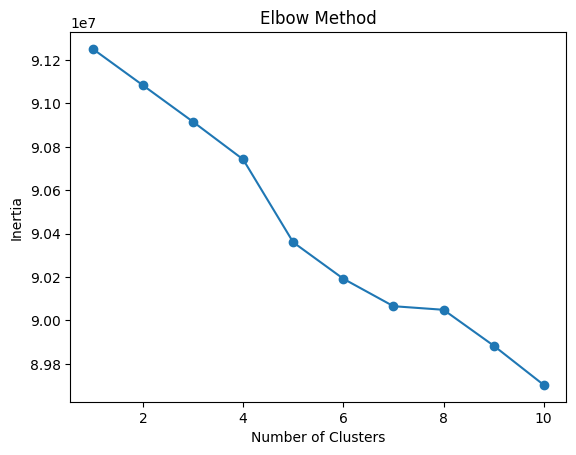

In [68]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [69]:
kmeans = KMeans(n_clusters=4, random_state=42)
dataset_encoded['Cluster'] = kmeans.fit_predict(scaled_data)

In [70]:
cluster_summary = dataset_encoded.groupby('Cluster').mean()
print(cluster_summary)

          Customer ID  Occupation  Marital_Status  Product_Category_1  \
Cluster                                                                 
0        1.003037e+06    8.179303        0.402728            2.723779   
1        1.003067e+06    8.627208        0.390459            1.000000   
2        1.003147e+06    7.101266        0.367089            5.000000   
3        1.003082e+06    8.080527        0.452416            8.000000   

         Product_Category_2  Product_Category_3      Purchase  \
Cluster                                                         
0                  6.872441           12.640457  11684.346732   
1                  5.000000           15.000000  11361.015901   
2                  8.000000           14.000000   6186.257384   
3                 14.000000           17.000000   7453.080527   

         Product_ID_P00000242  Product_ID_P00000642  Product_ID_P00001042  \
Cluster                                                                     
0               

Creating new Feature and modification of Data

In [71]:
dataset['Occ_City'] = dataset['Occupation'].astype(str) + "_" + dataset['City_Category']

In [72]:
dataset['Stay_Years'] = dataset['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

In [73]:
dataset_encoded = pd.get_dummies(dataset, columns=['Gender', 'Age', 'City_Category'], drop_first=True)

In [74]:
dataset['Category_1_grouped'] = pd.cut(dataset['Product_Category_1'], bins=[0,5,10,20], labels=['Low','Medium','High'])

In [82]:
customer_purchase = dataset.groupby('Customer ID')['Purchase'].sum().reset_index()
dataset = dataset.merge(customer_purchase, on='Customer ID', suffixes=('', '_Total'))

Dashboard and visualization

In [92]:
print(dataset.columns)

Index(['Customer ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Occ_City', 'Stay_Years', 'Category_1_grouped',
       'Purchase_Total_1'],
      dtype='object')


In [93]:
dataset = dataset.rename(columns={'Purchase_Total': 'Purchase_Total_1'})

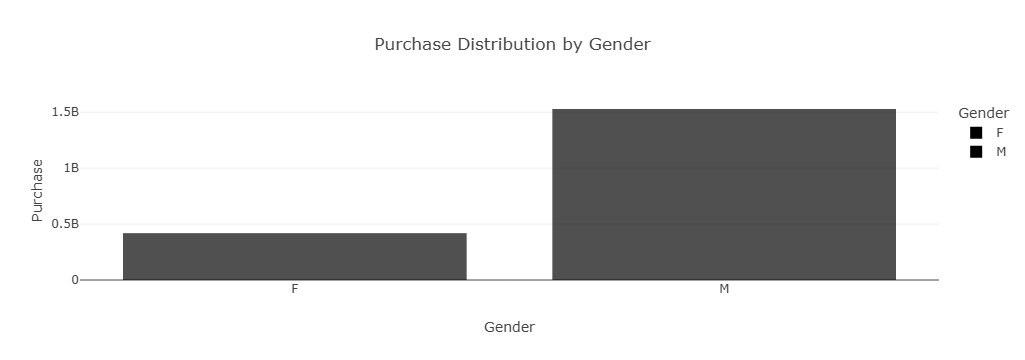

In [94]:
fig_gender = px.bar(dataset, x='Gender', y='Purchase', color='Gender', title='Purchase Distribution by Gender')
fig_gender.show()

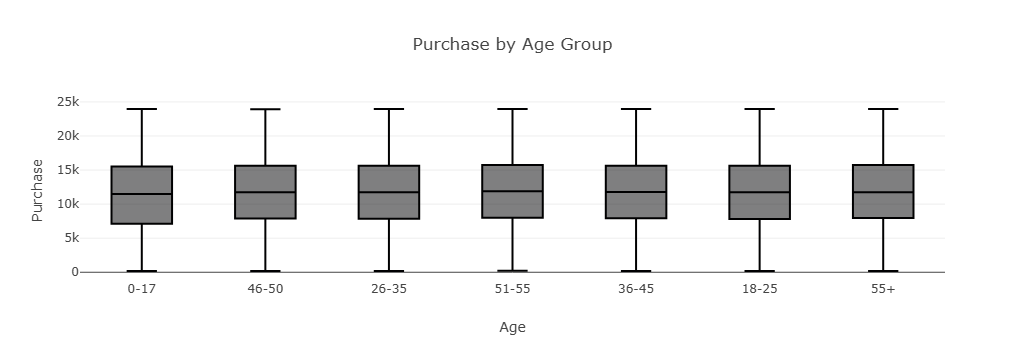

In [95]:
fig_age = px.box(dataset, x='Age', y='Purchase', title='Purchase by Age Group')
fig_age.show()

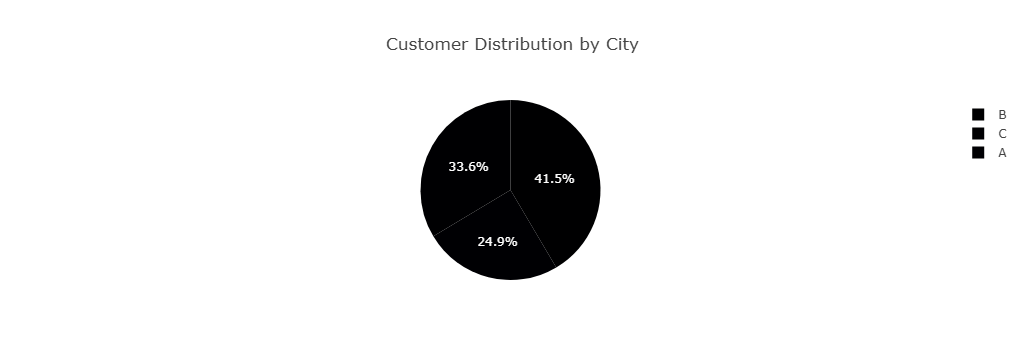

In [96]:
fig_city = px.pie(dataset, names='City_Category', title='Customer Distribution by City')
fig_city.show()